In [1]:
import numpy as np
import datetime as dt
import polars as pl
import matplotlib.pyplot as plt

from utils import MATURITIES 

In [5]:
df = pl.read_parquet("/Users/roystonvance/Desktop/Investing Projects/yield-curve/data/cyeepfugskwrdqag.parquet").select(["date"] + MATURITIES).filter(pl.col("date") > dt.date(2000,1,1))
df

date,gs3m,gs6m,gs1,gs2,gs3,gs5,gs7,gs10,gs20,gs30
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2000-01-31,5.5,5.76,6.12,6.44,6.49,6.58,6.7,6.66,6.86,6.63
2000-02-29,5.73,6.0,6.22,6.61,6.65,6.68,6.72,6.52,6.54,6.23
2000-03-31,5.86,6.11,6.22,6.53,6.53,6.5,6.51,6.26,6.38,6.05
2000-04-30,5.82,6.07,6.15,6.4,6.36,6.26,6.27,5.99,6.18,5.85
2000-05-31,5.99,6.39,6.33,6.81,6.77,6.69,6.69,6.44,6.55,6.15
…,…,…,…,…,…,…,…,…,…,…
2024-10-31,4.72,4.44,4.2,3.97,3.9,3.91,3.99,4.1,4.44,4.38
2024-11-30,4.62,4.43,4.33,4.26,4.21,4.23,4.29,4.36,4.63,4.54
2024-12-31,4.39,4.32,4.23,4.23,4.22,4.25,4.32,4.39,4.66,4.58


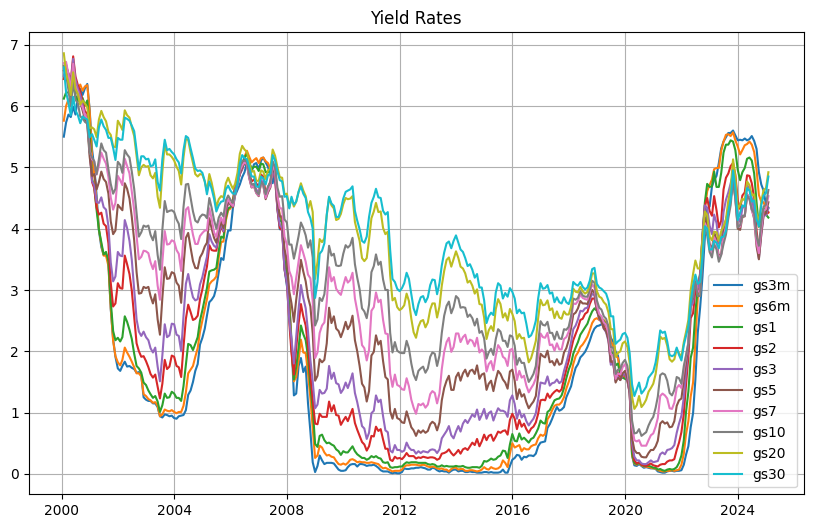

In [6]:
dates = df["date"]

plt.figure(figsize=(10, 6))
plt.title("Yield Rates")
for col in df.columns[1:]:
    plt.plot(dates, df[col], label = col)

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
slice = df.filter(
    pl.col("date").eq(dt.date(2000,1,31))
)
slice

In [ ]:
values = slice.drop("date").to_numpy()[0]
values

In [ ]:
plt.title("2020 January Yield-Curve")
plt.plot(slice.columns[1:], values)
plt.grid(True)
plt.show()

In [5]:
df

date,gs3m,gs6m,gs1,gs2,gs3,gs5,gs7,gs10,gs20,gs30
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1919-01-31,null,null,null,null,null,null,null,null,null,null
1919-02-28,null,null,null,null,null,null,null,null,null,null
1919-03-31,null,null,null,null,null,null,null,null,null,null
1919-04-30,null,null,null,null,null,null,null,null,null,null
1919-05-31,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…
2024-10-31,4.72,4.44,4.2,3.97,3.9,3.91,3.99,4.1,4.44,4.38
2024-11-30,4.62,4.43,4.33,4.26,4.21,4.23,4.29,4.36,4.63,4.54
2024-12-31,4.39,4.32,4.23,4.23,4.22,4.25,4.32,4.39,4.66,4.58


In [8]:
yields = df.unpivot(index="date", variable_name="maturity", value_name="yield")
yields

date,maturity,yield
date,str,f64
1919-01-31,"""gs3m""",null
1919-02-28,"""gs3m""",null
1919-03-31,"""gs3m""",null
1919-04-30,"""gs3m""",null
1919-05-31,"""gs3m""",null
…,…,…
2024-10-31,"""gs30""",4.38
2024-11-30,"""gs30""",4.54
2024-12-31,"""gs30""",4.58


In [13]:
(yields.with_columns(
    pl.col("yield").shift(1).over("maturity").alias("lag_yield")
)
.with_columns(
    (pl.col("yield") - pl.col("lag_yield")).alias("delta_yld")
)
.select(
    "date",
    "maturity",
    "delta_yld"
)
)

date,maturity,delta_yld
date,str,f64
1919-01-31,"""gs3m""",null
1919-02-28,"""gs3m""",null
1919-03-31,"""gs3m""",null
1919-04-30,"""gs3m""",null
1919-05-31,"""gs3m""",null
…,…,…
2024-10-31,"""gs30""",0.34
2024-11-30,"""gs30""",0.16
2024-12-31,"""gs30""",0.04
